In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import sys

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# Set the working directory to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

import numpy as np
import tensorflow as tf
import strawberryfields as sf
from strawberryfields.ops import *
import pickle
import random as rd
import warnings
from datetime import datetime
import uncertainty_toolbox as uct
from itertools import product
from tqdm import tqdm

from src.dataloader import get_data, quartic_data
from src.plotting import plot_predictions, plot_training_results, plot_predictions_new, plot_eval_metrics
from src.baseline import train_mlp_baseline, predict_mlp_baseline, train_polynomial_baseline, predict_polynomial_baseline
#TODO: make compute eval metrics function in uq script
from src.uq import selective_prediction #, compute_eval_metrics
from src.modelmegabigding import train_megabigmemristor, predict_megabigmemristor #, build_circuit
from src.utils import format_metrics, format_hyperparameters
#from src.main import hyperparameter_optimization
from src.logger import ExperimentLogger, log_experiment_id

tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
rd.seed(42)

ImportError: cannot import name 'simps' from 'scipy.integrate' (/Users/anani/Code/uq-qnn/.venv/lib/python3.13/site-packages/scipy/integrate/__init__.py)

In [2]:
class Config:

    
    LOG_NAME = f"logs_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
    LOG_FILE_NAME = f"reports/logs/experiment_{LOG_NAME}/log.txt"
    LOG_PATH = f"reports/logs/experiment_{LOG_NAME}/"
    
    # Hyperparameter Optimization
    HYPERPARAMETER_OPTIMIZATION = False
    HYPER_STEPS_RANGE = [10]
    HYPER_LEARNING_RATE_RANGE = [0.1]
    HYPER_MEMORY_DEPTH_RANGE = [4, 6]
    HYPER_CUTOFF_DIM_RANGE = [4, 6]

    # Model Comparison
    MODEL_COMPARISON = False
    COMP_N_SAMPLES = [2]
    COMP_MLP_ARCH = [[32], [64, 64], [128, 64, 64]]

    #TODO: Check for which params we have the same loss
    MLP_HIDDEN_LAYERS = [64, 64]
    MLP_EPOCHS = 100
    MLP_LEARNING_RATE = 0.01

    POLYNOMIAL_DEGREE = 3

    # Selective Prediction
    SELECTIVE_PREDICTION_THRESHOLD = 0.8

    # QNN Hyperparameters
    MEMORY_DEPTH = 2
    CUTOFF_DIM = 2
    TRAINING_STEPS = 5
    TRAINING_LEARNING_RATE = 0.2

    PREDICT_STOCHASTIC = True
    PREDICT_SAMPLES = 20
    PREDICT_VARIANCE = 0.1

    GET_DATA_N_DATA = 200
    GET_DATA_SIGMA_NOISE_1 = 0.1
    GET_DATA_DATAFUNCTION = quartic_data

    PARAM_ID = f"qnn_hp_s{TRAINING_STEPS}_lr{TRAINING_LEARNING_RATE}_md{MEMORY_DEPTH}_cd{CUTOFF_DIM}"


In [3]:
# Create directory called experiment_CONFIG.LOG_NAME in reports/logs
os.makedirs(f"reports/logs/experiment_{Config.LOG_NAME}", exist_ok=False)

# Log experiment id
log_experiment_id(Config.LOG_FILE_NAME, Config.PARAM_ID, name="Experiment")

with open(Config.LOG_FILE_NAME, "a") as f:
    f.write("=" * 80 + "\n")
    f.write(f"Experiment_{Config.LOG_NAME}\n")
    f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write("=" * 80 + "\n\n")


X_train, y_train, X_test, y_test, _ = get_data(n_data=Config.GET_DATA_N_DATA, 
                                                sigma_noise_1=Config.GET_DATA_SIGMA_NOISE_1, 
                                                datafunction=Config.GET_DATA_DATAFUNCTION
                                                )

In [4]:
tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")

logger = ExperimentLogger()

# Train model
res_mem, phase1, phase2, phase4, phase8, phase9, phase10, phase11, phase12, memristor_weight = train_megabigmemristor(X_train, 
                                                            y_train, 
                                                            memory_depth=Config.MEMORY_DEPTH, 
                                                            training_steps=Config.TRAINING_STEPS,
                                                            learning_rate=Config.TRAINING_LEARNING_RATE,
                                                            cutoff_dim=Config.CUTOFF_DIM,
                                                            log_filepath=Config.LOG_FILE_NAME,
                                                            log_path=Config.LOG_PATH,
                                                            param_id=Config.PARAM_ID,
                                                            logger=logger
                                                            )

Training:   0%|          | 0/5 [00:00<?, ?step/s]

tf.Tensor(0.008161549098351595, shape=(), dtype=float64)


tf.Tensor(0.010050920722739467, shape=(), dtype=float64)


tf.Tensor(0.012178040765315555, shape=(), dtype=float64)


tf.Tensor(0.01433813271105443, shape=(), dtype=float64)


tf.Tensor(0.016449463309513503, shape=(), dtype=float64)


tf.Tensor(0.018529379927985288, shape=(), dtype=float64)


tf.Tensor(0.020563009602754503, shape=(), dtype=float64)


tf.Tensor(0.022553966959544376, shape=(), dtype=float64)


tf.Tensor(0.024503236664947897, shape=(), dtype=float64)


tf.Tensor(0.02641268883725694, shape=(), dtype=float64)


tf.Tensor(0.02828401087306558, shape=(), dtype=float64)


tf.Tensor(0.030118824207769825, shape=(), dtype=float64)


tf.Tensor(0.031918704958800045, shape=(), dtype=float64)


tf.Tensor(0.03368517231054652, shape=(), dtype=float64)


tf.Tensor(0.035419692053086656, shape=(), dtype=float64)


tf.Tensor(0.03712369412940877, shape=(), dtype=float64)


tf.Tensor(0.03879855559905143, shape=(), dtype=float64)


tf.Tensor(0.040445603098634035, shape=(), dtype=float64)


tf.Tensor(0.04206612900260572, shape=(), dtype=float64)


tf.Tensor(0.04366137124185259, shape=(), dtype=float64)


tf.Tensor(0.045232524920717054, shape=(), dtype=float64)


tf.Tensor(0.046780741468251334, shape=(), dtype=float64)


tf.Tensor(0.04830713247248127, shape=(), dtype=float64)


tf.Tensor(0.04981276209687498, shape=(), dtype=float64)


tf.Tensor(0.051298654096122435, shape=(), dtype=float64)


tf.Tensor(0.05276578630761625, shape=(), dtype=float64)


tf.Tensor(0.05421509776922534, shape=(), dtype=float64)


tf.Tensor(0.05564748600378459, shape=(), dtype=float64)


tf.Tensor(0.05706380575437101, shape=(), dtype=float64)


tf.Tensor(0.058464873852342475, shape=(), dtype=float64)


tf.Tensor(0.05985146059983284, shape=(), dtype=float64)


tf.Tensor(0.06122429651346584, shape=(), dtype=float64)


tf.Tensor(0.06258407528157171, shape=(), dtype=float64)


tf.Tensor(0.06393144567093277, shape=(), dtype=float64)


tf.Tensor(0.06526701636872909, shape=(), dtype=float64)


tf.Tensor(0.06659135849985978, shape=(), dtype=float64)


tf.Tensor(0.06790500102669378, shape=(), dtype=float64)


tf.Tensor(0.06920842969374233, shape=(), dtype=float64)


tf.Tensor(0.07050208514148913, shape=(), dtype=float64)


tf.Tensor(0.07178637515998028, shape=(), dtype=float64)


tf.Tensor(0.0730616638005978, shape=(), dtype=float64)


tf.Tensor(0.07432827257600341, shape=(), dtype=float64)


tf.Tensor(0.07558647393933458, shape=(), dtype=float64)


tf.Tensor(0.07683650248743433, shape=(), dtype=float64)


tf.Tensor(0.07807855046354079, shape=(), dtype=float64)


tf.Tensor(0.0793127701178457, shape=(), dtype=float64)


tf.Tensor(0.08053926557899425, shape=(), dtype=float64)


tf.Tensor(0.08175809160685141, shape=(), dtype=float64)


tf.Tensor(0.082969263772598, shape=(), dtype=float64)


tf.Tensor(0.08417275892212082, shape=(), dtype=float64)


tf.Tensor(0.08536850018605083, shape=(), dtype=float64)


tf.Tensor(0.08655636485290462, shape=(), dtype=float64)


tf.Tensor(0.08773618344855666, shape=(), dtype=float64)


tf.Tensor(0.0889077480575389, shape=(), dtype=float64)


tf.Tensor(0.09007079895274374, shape=(), dtype=float64)


tf.Tensor(0.09122503431615639, shape=(), dtype=float64)


tf.Tensor(0.09237009918375275, shape=(), dtype=float64)


tf.Tensor(0.09350559152978499, shape=(), dtype=float64)


tf.Tensor(0.09463107034389856, shape=(), dtype=float64)


tf.Tensor(0.09574604673364341, shape=(), dtype=float64)


tf.Tensor(0.09684998329545982, shape=(), dtype=float64)


tf.Tensor(0.09794230007735902, shape=(), dtype=float64)


tf.Tensor(0.09902236906533503, shape=(), dtype=float64)


tf.Tensor(0.10008952631932613, shape=(), dtype=float64)


tf.Tensor(0.10114306196938169, shape=(), dtype=float64)


tf.Tensor(0.10218223000095412, shape=(), dtype=float64)


tf.Tensor(0.10320624011662075, shape=(), dtype=float64)


tf.Tensor(0.10421426323225419, shape=(), dtype=float64)


tf.Tensor(0.10520544746211168, shape=(), dtype=float64)


tf.Tensor(0.10617889498575489, shape=(), dtype=float64)


tf.Tensor(0.1069548597716001, shape=(), dtype=float64)


tf.Tensor(0.10799137625879374, shape=(), dtype=float64)


tf.Tensor(0.10931968126833405, shape=(), dtype=float64)


tf.Tensor(0.11085470701009767, shape=(), dtype=float64)


tf.Tensor(0.11262331455211623, shape=(), dtype=float64)


tf.Tensor(0.11465710219201539, shape=(), dtype=float64)


tf.Tensor(0.11698418873361324, shape=(), dtype=float64)


tf.Tensor(0.11963427057186146, shape=(), dtype=float64)


tf.Tensor(0.1226385224195025, shape=(), dtype=float64)


tf.Tensor(0.12603009376204913, shape=(), dtype=float64)


tf.Tensor(0.12984428239484747, shape=(), dtype=float64)


tf.Tensor(0.1341185941226016, shape=(), dtype=float64)


tf.Tensor(0.13889287986452406, shape=(), dtype=float64)


tf.Tensor(0.14420943338723477, shape=(), dtype=float64)


tf.Tensor(0.15011311127522697, shape=(), dtype=float64)


tf.Tensor(0.15665144686006222, shape=(), dtype=float64)


tf.Tensor(0.16387475594849826, shape=(), dtype=float64)


tf.Tensor(0.17183625623681448, shape=(), dtype=float64)


tf.Tensor(0.18059221805539963, shape=(), dtype=float64)


tf.Tensor(0.19020206682020618, shape=(), dtype=float64)


tf.Tensor(0.2007285314830625, shape=(), dtype=float64)


tf.Tensor(0.2122377847903324, shape=(), dtype=float64)


tf.Tensor(0.22479955138193172, shape=(), dtype=float64)


tf.Tensor(0.2384873101559848, shape=(), dtype=float64)


tf.Tensor(0.25337837924503626, shape=(), dtype=float64)


tf.Tensor(0.2695541310070385, shape=(), dtype=float64)


tf.Tensor(0.2871000591113135, shape=(), dtype=float64)


tf.Tensor(0.3061060896074303, shape=(), dtype=float64)


tf.Tensor(0.32666655595851846, shape=(), dtype=float64)


tf.Tensor(0.34888048524473364, shape=(), dtype=float64)


tf.Tensor(0.37285174749467226, shape=(), dtype=float64)


tf.Tensor(0.39868924264193784, shape=(), dtype=float64)


tf.Tensor(0.4265069942882154, shape=(), dtype=float64)


tf.Tensor(0.4564244891862652, shape=(), dtype=float64)


tf.Tensor(0.4885667034306904, shape=(), dtype=float64)


tf.Tensor(0.5230643789255638, shape=(), dtype=float64)


tf.Tensor(0.5600541829372925, shape=(), dtype=float64)


tf.Tensor(0.5996788831266702, shape=(), dtype=float64)


tf.Tensor(0.6420875965979959, shape=(), dtype=float64)


tf.Tensor(0.6874360008903287, shape=(), dtype=float64)


tf.Tensor(0.7358863725932716, shape=(), dtype=float64)


tf.Tensor(0.7876080215740341, shape=(), dtype=float64)


tf.Tensor(0.8427772847602407, shape=(), dtype=float64)


tf.Tensor(0.9015778262926918, shape=(), dtype=float64)


tf.Tensor(0.9642008222510821, shape=(), dtype=float64)


tf.Tensor(1.0308451823652924, shape=(), dtype=float64)


tf.Tensor(1.1017176490097038, shape=(), dtype=float64)


tf.Tensor(1.1770331016996676, shape=(), dtype=float64)


tf.Tensor(1.2570146175956056, shape=(), dtype=float64)


tf.Tensor(1.3418937885338058, shape=(), dtype=float64)


tf.Tensor(1.4319108332535553, shape=(), dtype=float64)


tf.Tensor(1.5273146318400808, shape=(), dtype=float64)


tf.Tensor(1.6283630396821969, shape=(), dtype=float64)


tf.Tensor(1.735322878949652, shape=(), dtype=float64)


tf.Tensor(1.848470121502014, shape=(), dtype=float64)


tf.Tensor(1.9680898969206144, shape=(), dtype=float64)


tf.Tensor(2.0944765823343507, shape=(), dtype=float64)


tf.Tensor(2.2279337834295356, shape=(), dtype=float64)


tf.Tensor(2.3687741341044424, shape=(), dtype=float64)


tf.Tensor(2.517319508454025, shape=(), dtype=float64)


tf.Tensor(2.673900395659948, shape=(), dtype=float64)


tf.Tensor(2.8388559259098516, shape=(), dtype=float64)


tf.Tensor(3.0125334184643324, shape=(), dtype=float64)


tf.Tensor(3.195287684550818, shape=(), dtype=float64)


tf.Tensor(3.387480368770454, shape=(), dtype=float64)


tf.Tensor(3.58947875601673, shape=(), dtype=float64)


tf.Tensor(3.8016547969992645, shape=(), dtype=float64)


tf.Tensor(4.024382881547395, shape=(), dtype=float64)


tf.Tensor(4.258037658842341, shape=(), dtype=float64)


tf.Tensor(4.502990818486559, shape=(), dtype=float64)


tf.Tensor(4.759606711553648, shape=(), dtype=float64)


tf.Tensor(5.0282359168433075, shape=(), dtype=float64)


tf.Tensor(5.309206335508911, shape=(), dtype=float64)


tf.Tensor(5.602809594078735, shape=(), dtype=float64)


tf.Tensor(5.909279619949025, shape=(), dtype=float64)


tf.Tensor(6.228755817205894, shape=(), dtype=float64)


tf.Tensor(6.5612129447945575, shape=(), dtype=float64)


tf.Tensor(6.906302486004463, shape=(), dtype=float64)


tf.Tensor(7.2628568975773256, shape=(), dtype=float64)


tf.Tensor(7.621596249113075, shape=(), dtype=float64)


Training:  20%|██        | 1/5 [01:52<07:30, 112.73s/step, loss=7.6216]

tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


Step 2/5:  69%|██████▊   | 103/150 [00:44<00:17,  2.71sample/s]

tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


Step 2/5:  73%|███████▎  | 109/150 [00:46<00:08,  4.63sample/s]

tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


Step 2/5:  77%|███████▋  | 115/150 [00:47<00:06,  5.35sample/s]

tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


Step 2/5:  83%|████████▎ | 125/150 [00:49<00:05,  4.49sample/s]

tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


Step 2/5:  96%|█████████▌| 144/150 [00:55<00:01,  3.10sample/s]

tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)
tf.Tensor(nan, shape=(), dtype=float64)


tf.Tensor(nan, shape=(), dtype=float64)


Training:  20%|██        | 1/5 [04:51<19:27, 291.96s/step, loss=7.6216]


KeyboardInterrupt: 

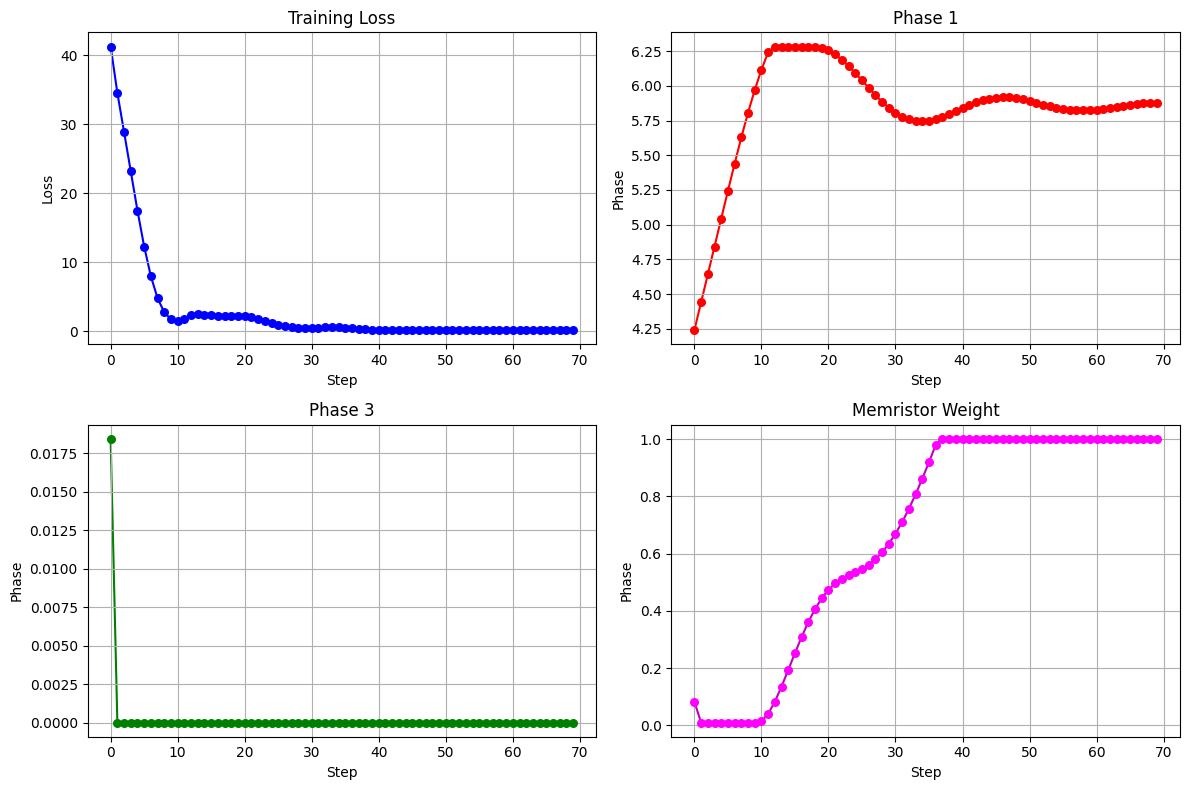

In [5]:
plot_training_results(res_mem)

In [6]:
# Predict model
final_predictions, targets, predictive_uncertainty, all_predictions = predict_megabigmemristor(X_test, 
                                                                y_test, 
                                                                memory_depth=Config.MEMORY_DEPTH, 
                                                                phase1=phase1,
                                                                phase2=phase2, 
                                                                phase4=phase4, 
                                                                phase8=phase8, 
                                                                phase9=phase9, 
                                                                phase10=phase10, 
                                                                phase11=phase11, 
                                                                phase12=phase12,
                                                                memristor_weight=memristor_weight,
                                                                stochastic=Config.PREDICT_STOCHASTIC, 
                                                                var=Config.PREDICT_VARIANCE, 
                                                                samples=Config.PREDICT_SAMPLES,
                                                                cutoff_dim=Config.CUTOFF_DIM,
                                                                param_id=Config.PARAM_ID,
                                                                logger=logger
                                                                )                                                                                                                                

Running 20 samples with variance 0.1...


Prediction Samples: 100%|██████████| 20/20 [2:27:37<00:00, 442.90s/sample]   


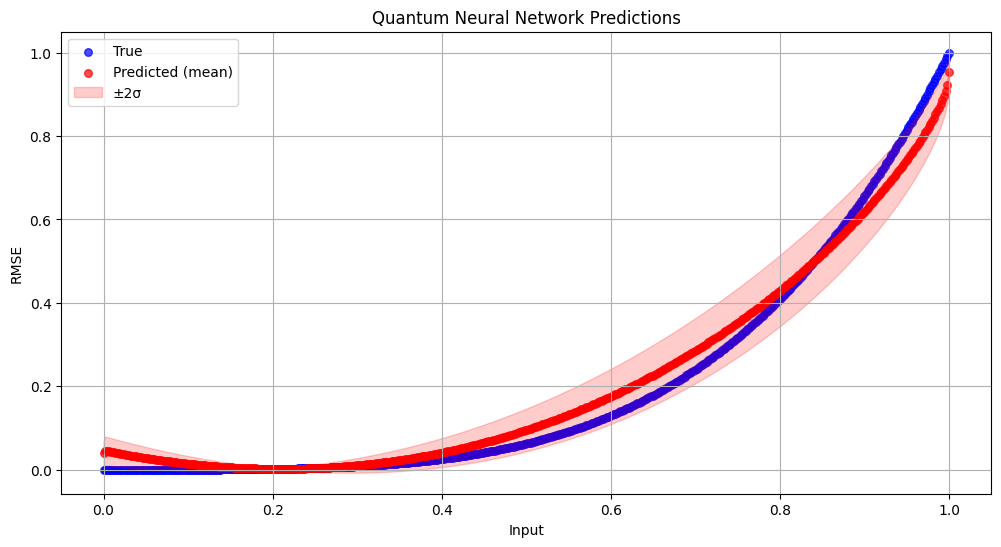

In [7]:
plot_predictions_new(X_test, y_test, final_predictions, predictive_uncertainty)

In [8]:
# Compute evaluation metrics for full predictions
full_metrics, full_metric_categories = compute_eval_metrics(predictions, 
                                                            targets, 
                                                            predictive_uncertainty,
                                                            Config.LOG_FILE_NAME,
                                                            Config.PARAM_ID,
                                                            name="Full Prediction"
                                                            )

NameError: name 'compute_eval_metrics' is not defined

In [27]:
sel_predictions, sel_targets, sel_uncertainty, remaining_fraction = selective_prediction(predictions, 
                                                                                                targets, 
                                                                                                predictive_uncertainty, 
                                                                                                threshold=Config.SELECTIVE_PREDICTION_THRESHOLD
                                                                                                )

In [ ]:
# QNN Hyperparameters
MEMORY_DEPTH = 6
CUTOFF_DIM = 4
TRAINING_STEPS = 70
TRAINING_LEARNING_RATE = 0.1

PREDICT_STOCHASTIC = False
PREDICT_SAMPLES = 2
PREDICT_VARIANCE = 0.1

GET_DATA_N_DATA = 200
GET_DATA_SIGMA_NOISE_1 = 0.1
GET_DATA_DATAFUNCTION = quartic_data

# Selective Prediction
SELECTIVE_PREDICTION_THRESHOLD = 0.8

PARAM_ID = f"qnn_stoch{PREDICT_STOCHASTIC}_psamples{PREDICT_SAMPLES}_pvar{PREDICT_VARIANCE}_ndata{GET_DATA_N_DATA}_snoise{GET_DATA_SIGMA_NOISE_1}_threshold{SELECTIVE_PREDICTION_THRESHOLD}"


with open(Config.LOG_FILE_NAME, "a") as f:
        f.write("=" * 80 + "\n")
        f.write(f"Experiment_{Config.LOG_NAME}\n")
        f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write("=" * 80 + "\n\n")

res_mem, phase1, phase3, memristor_weight = train_memristor(X_train, 
                                                            y_train, 
                                                            memory_depth=MEMORY_DEPTH, 
                                                            training_steps=TRAINING_STEPS,
                                                            learning_rate=TRAINING_LEARNING_RATE,
                                                            cutoff_dim=CUTOFF_DIM,
                                                            log_filepath=Config.LOG_FILE_NAME,
                                                            log_path=Config.LOG_PATH,
                                                            param_id=PARAM_ID
                                                            )


In [ ]:
# Deterministic 

PREDICT_STOCHASTIC = False
PREDICT_SAMPLES = 30
PREDICT_VARIANCE = 0.1

GET_DATA_N_DATA = 200
GET_DATA_SIGMA_NOISE_1 = 0.1
GET_DATA_DATAFUNCTION = quartic_data

# Selective Prediction
SELECTIVE_PREDICTION_THRESHOLD = 0.8

PARAM_ID = f"qnn_stoch{PREDICT_STOCHASTIC}_psamples{PREDICT_SAMPLES}_pvar{PREDICT_VARIANCE}_ndata{GET_DATA_N_DATA}_snoise{GET_DATA_SIGMA_NOISE_1}_threshold{SELECTIVE_PREDICTION_THRESHOLD}"

with open(Config.LOG_FILE_NAME, "a") as f:
        f.write("=" * 80 + "\n")
        f.write(f"Experiment_{PARAM_ID}\n")
        f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write("=" * 80 + "\n\n")

# Save training results
# with open(f"{Config.LOG_FILE_NAME}.pkl", "wb") as file:
#     pickle.dump(res_mem, file)

# Predict using the trained model
predictions, targets, predictive_uncertainty = predict_memristor(X_test, 
                                                                y_test, 
                                                                memory_depth=MEMORY_DEPTH, 
                                                                phase1=phase1, 
                                                                phase3=phase3, 
                                                                memristor_weight=memristor_weight,
                                                                stochastic=PREDICT_STOCHASTIC, 
                                                                var=PREDICT_VARIANCE, 
                                                                samples=PREDICT_SAMPLES,
                                                                cutoff_dim=CUTOFF_DIM,
                                                                log_filepath=Config.LOG_FILE_NAME,
                                                                log_path=Config.LOG_PATH,
                                                                param_id=PARAM_ID
                                                                )

# Ensure predictions and X_test have the same length
assert len(predictions) == len(X_test), "Predictions and X_test must have the same length"

# Convert predictions, targets, and predictive_uncertainty to NumPy arrays
predictions = np.array(predictions)
targets = np.array(targets)
predictive_uncertainty = np.array(predictive_uncertainty)

# Compute evaluation metrics for full predictions
full_metrics, full_metric_categories = compute_eval_metrics(predictions, 
                                                            targets, 
                                                            predictive_uncertainty,
                                                            Config.LOG_FILE_NAME,
                                                            PARAM_ID,
                                                            name="Full Prediction"
                                                            )

if PREDICT_STOCHASTIC:
    # Apply selective prediction
    sel_predictions, sel_targets, sel_uncertainty, remaining_fraction = selective_prediction(predictions, 
                                                                                            targets, 
                                                                                            predictive_uncertainty, 
                                                                                            threshold=Config.SELECTIVE_PREDICTION_THRESHOLD
                                                                                            )
    

    # Compute evaluation metrics for selective predictions
    sel_metrics, sel_metric_categories = compute_eval_metrics(sel_predictions, 
                                                            sel_targets, 
                                                            sel_uncertainty,
                                                            Config.LOG_FILE_NAME,
                                                            PARAM_ID,
                                                            name="Selective Prediction"
                                                            )

    # Save results to log file
    with open(Config.LOG_FILE_NAME, "a") as f:
        f.write(f"Selective Prediction Fraction: {remaining_fraction}\n")
        f.write("\n\n")

    # Plotting the results
    plot_predictions(
        X_train.numpy(), y_train.numpy(), X_test.numpy(), y_test.numpy(),
        predictions, pred_std=predictive_uncertainty, epistemic=predictive_uncertainty,
        aleatoric=None, title="Memristor Model Predictions vs Targets", save_path=Config.LOG_PATH+f"prediction_uncertainty_{PARAM_ID}.png"
    )



In [ ]:
PREDICT_STOCHASTIC = True
PREDICT_SAMPLES = [30, 50, 100]
PREDICT_VARIANCE = 0.1

GET_DATA_N_DATA = 200
GET_DATA_SIGMA_NOISE_1 = 0.1
GET_DATA_DATAFUNCTION = quartic_data

# Selective Prediction
SELECTIVE_PREDICTION_THRESHOLD = 0.8

sample_storage = []

for samples in PREDICT_SAMPLES:

    PARAM_ID = f"qnnv2_stoch{PREDICT_STOCHASTIC}_psamples{samples}_pvar{PREDICT_VARIANCE}_ndata{GET_DATA_N_DATA}_snoise{GET_DATA_SIGMA_NOISE_1}_threshold{SELECTIVE_PREDICTION_THRESHOLD}"

    with open(Config.LOG_FILE_NAME, "a") as f:
            f.write("=" * 80 + "\n")
            f.write(f"Experiment_{PARAM_ID}\n")
            f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write("=" * 80 + "\n\n")

    # Save training results
    # with open(f"{Config.LOG_FILE_NAME}.pkl", "wb") as file:
    #     pickle.dump(res_mem, file)

    # Predict using the trained model
    predictions, targets, predictive_uncertainty = predict_memristor(X_test, 
                                                                    y_test, 
                                                                    memory_depth=MEMORY_DEPTH, 
                                                                    phase1=phase1, 
                                                                    phase3=phase3, 
                                                                    memristor_weight=memristor_weight,
                                                                    stochastic=PREDICT_STOCHASTIC, 
                                                                    var=PREDICT_VARIANCE, 
                                                                    samples=samples,
                                                                    cutoff_dim=CUTOFF_DIM,
                                                                    log_filepath=Config.LOG_FILE_NAME,
                                                                    log_path=Config.LOG_PATH,
                                                                    param_id=PARAM_ID
                                                                    )
    sample_storage.append((predictions, targets, predictive_uncertainty))
    # Ensure predictions and X_test have the same length
    assert len(predictions) == len(X_test), "Predictions and X_test must have the same length"

    # Convert predictions, targets, and predictive_uncertainty to NumPy arrays
    predictions = np.array(predictions)
    targets = np.array(targets)
    predictive_uncertainty = np.array(predictive_uncertainty)

    # Compute evaluation metrics for full predictions
    full_metrics, full_metric_categories = compute_eval_metrics(predictions, 
                                                                targets, 
                                                                predictive_uncertainty,
                                                                Config.LOG_FILE_NAME,
                                                                PARAM_ID,
                                                                name="Full Prediction"
                                                                )

    if PREDICT_STOCHASTIC:
        # Apply selective prediction
        sel_predictions, sel_targets, sel_uncertainty, remaining_fraction = selective_prediction(predictions, 
                                                                                                targets, 
                                                                                                predictive_uncertainty, 
                                                                                                threshold=Config.SELECTIVE_PREDICTION_THRESHOLD
                                                                                                )
        

        # Compute evaluation metrics for selective predictions
        sel_metrics, sel_metric_categories = compute_eval_metrics(sel_predictions, 
                                                                sel_targets, 
                                                                sel_uncertainty,
                                                                Config.LOG_FILE_NAME,
                                                                PARAM_ID,
                                                                name="Selective Prediction"
                                                                )

        # Save results to log file
        with open(Config.LOG_FILE_NAME, "a") as f:
            f.write(f"Selective Prediction Fraction: {remaining_fraction}\n")
            f.write("\n\n")

        # Plotting the results
        plot_predictions(
            X_train.numpy(), y_train.numpy(), X_test.numpy(), y_test.numpy(),
            predictions, pred_std=predictive_uncertainty, epistemic=predictive_uncertainty,
            aleatoric=None, title="Memristor Model Predictions vs Targets", save_path=Config.LOG_PATH+f"prediction_uncertainty_{PARAM_ID}.png"
        )

In [ ]:
# Different selective prediction thresholds

PREDICT_STOCHASTIC = True
# PREDICT_SAMPLES = [30, 50, 100]
PREDICT_VARIANCE = 0.1

GET_DATA_N_DATA = 200
GET_DATA_SIGMA_NOISE_1 = 0.1
GET_DATA_DATAFUNCTION = quartic_data

# Selective Prediction
SELECTIVE_PREDICTION_THRESHOLD = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

rmse_values_dic = {str(PREDICT_SAMPLES[i]) : [] for i in range(len(PREDICT_SAMPLES))}

for index, samples in enumerate(sample_storage):
    for threshold in SELECTIVE_PREDICTION_THRESHOLD:
        

        PARAM_ID = f"qnn_stoch{PREDICT_STOCHASTIC}_psamples{PREDICT_SAMPLES}_pvar{PREDICT_VARIANCE}_ndata{GET_DATA_N_DATA}_snoise{GET_DATA_SIGMA_NOISE_1}_threshold{threshold}"

        with open(Config.LOG_FILE_NAME, "a") as f:
                f.write("=" * 80 + "\n")
                f.write(f"Experiment_{PARAM_ID}\n")
                f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
                f.write("=" * 80 + "\n\n")

        if PREDICT_STOCHASTIC:
            # Apply selective prediction
            sel_predictions, sel_targets, sel_uncertainty, remaining_fraction = selective_prediction(samples[0], 
                                                                                                    samples[1], 
                                                                                                    samples[2], 
                                                                                                    threshold=threshold
                                                                                                    )
            
            plot_predictions_new(X_test, y_test, predictions, predictive_uncertainty, Config.LOG_PATH+f"prediction_results_{PARAM_ID}.png")

            # Compute evaluation metrics for selective predictions
            sel_metrics, sel_metric_categories = compute_eval_metrics(sel_predictions, 
                                                                    sel_targets, 
                                                                    sel_uncertainty,
                                                                    Config.LOG_FILE_NAME,
                                                                    PARAM_ID,
                                                                    name="Selective Prediction"
                                                                    )
            
            rmse_values_dic[str(PREDICT_SAMPLES[index])].append(sel_metrics['accuracy']["rmse"])

            # Save results to log file
            with open(Config.LOG_FILE_NAME, "a") as f:
                f.write(f"Selective Prediction Fraction: {remaining_fraction}\n")
                f.write("\n\n")

            # Plotting the results
            plot_predictions(
                X_train.numpy(), y_train.numpy(), X_test.numpy(), y_test.numpy(),
                predictions, pred_std=predictive_uncertainty, epistemic=predictive_uncertainty,
                aleatoric=None, title="Memristor Model Predictions vs Targets", save_path=Config.LOG_PATH+f"prediction_uncertainty_{PARAM_ID}.png"
            )



In [ ]:
import matplotlib.pyplot as plt



def plot_rmse_vs_threshold(rmse_values_dic, save_path=None):
    # After storing RMSE values in rmse_values_dic, add the plotting code
    plt.figure(figsize=(10, 6))

    # Iterate over each sample size and its corresponding RMSE values
    for sample_size_str, rmse_values in rmse_values_dic.items():
        # Convert sample size back to integer or keep as string for labeling
        sample_size = int(sample_size_str)
        # Plot RMSE vs Threshold for this sample size
        plt.plot(SELECTIVE_PREDICTION_THRESHOLD, rmse_values, marker='o', label=f'Samples = {sample_size}')

    # Customize the plot
    plt.xlabel('Selective Quantile Threshold')
    plt.ylabel('RMSE')
    plt.axhline(0.03445702371, color='crimson', alpha=0.75, linestyle='--', label='Full Prediction RMSE')
    plt.title('RMSE vs Selective Quantile Threshold for Different Sample Sizes')
    plt.legend(title='Number of Prediction Samples')
    plt.grid(True)

    if save_path is not None:
        plt.savefig(save_path)
    else:
        plt.show()


for n_samples, sample in enumerate(sample_storage):
    plot_predictions_new(X_test, y_test, sample[0], sample[2], Config.LOG_PATH+f"prediction_{PREDICT_SAMPLES[n_samples]}_{PARAM_ID}.png")

plot_rmse_vs_threshold(rmse_values_dic, Config.LOG_PATH+f"rmse_vs_threshold.png")